In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import shap
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler

## Import Data and create training and testing datasets

In [2]:
credit_data= pd.read_csv('GiveMeSomeCredit/cs-training.csv', index_col=0)

In [3]:
credit_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.240387,4.155179,0.0,0.000000,0.000000,0.000000,98.0


In [40]:
credit_data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,0.0,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [18]:
credit_data['SeriousDlqin2yrs'].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

In [4]:
print('No Serious Delinquencies', round(credit_data['SeriousDlqin2yrs'].value_counts()[0]/len(credit_data) * 100,2), '% of the dataset')
print('Serious Delinquencies', round(credit_data['SeriousDlqin2yrs'].value_counts()[1]/len(credit_data) * 100,2), '% of the dataset')

No Serious Delinquencies 93.32 % of the dataset
Serious Delinquencies 6.68 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Serious Delinquencies || 1: Serious Delinquencies)')

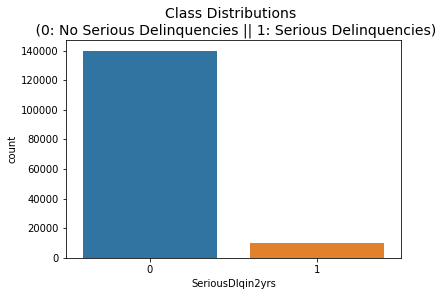

In [5]:
sns.countplot(x='SeriousDlqin2yrs', data=credit_data)
plt.title('Class Distributions \n (0: No Serious Delinquencies || 1: Serious Delinquencies)', fontsize=14)

In [6]:
credit_data.dtypes

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

## Exploratory Data Analysis

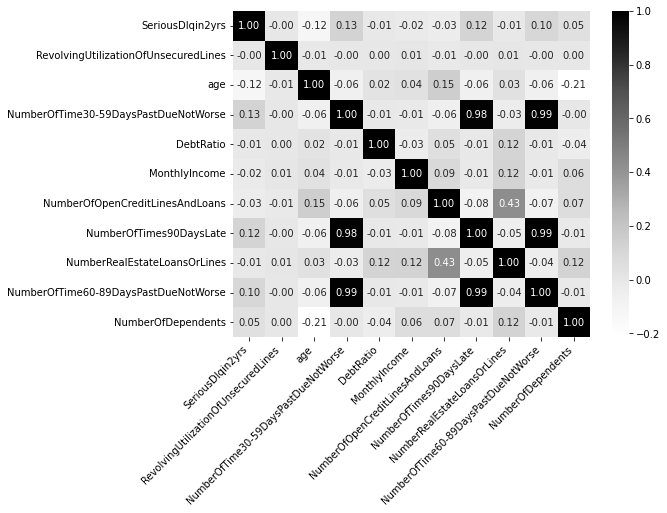

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(credit_data.corr(), annot=True, cmap="Greys", fmt=".2f", cbar=True)
plt.xticks(rotation=45, ha='right') 
plt.show()

In [8]:
sampled_data = credit_data.sample(n=1000, random_state=42)

<Figure size 1080x720 with 0 Axes>

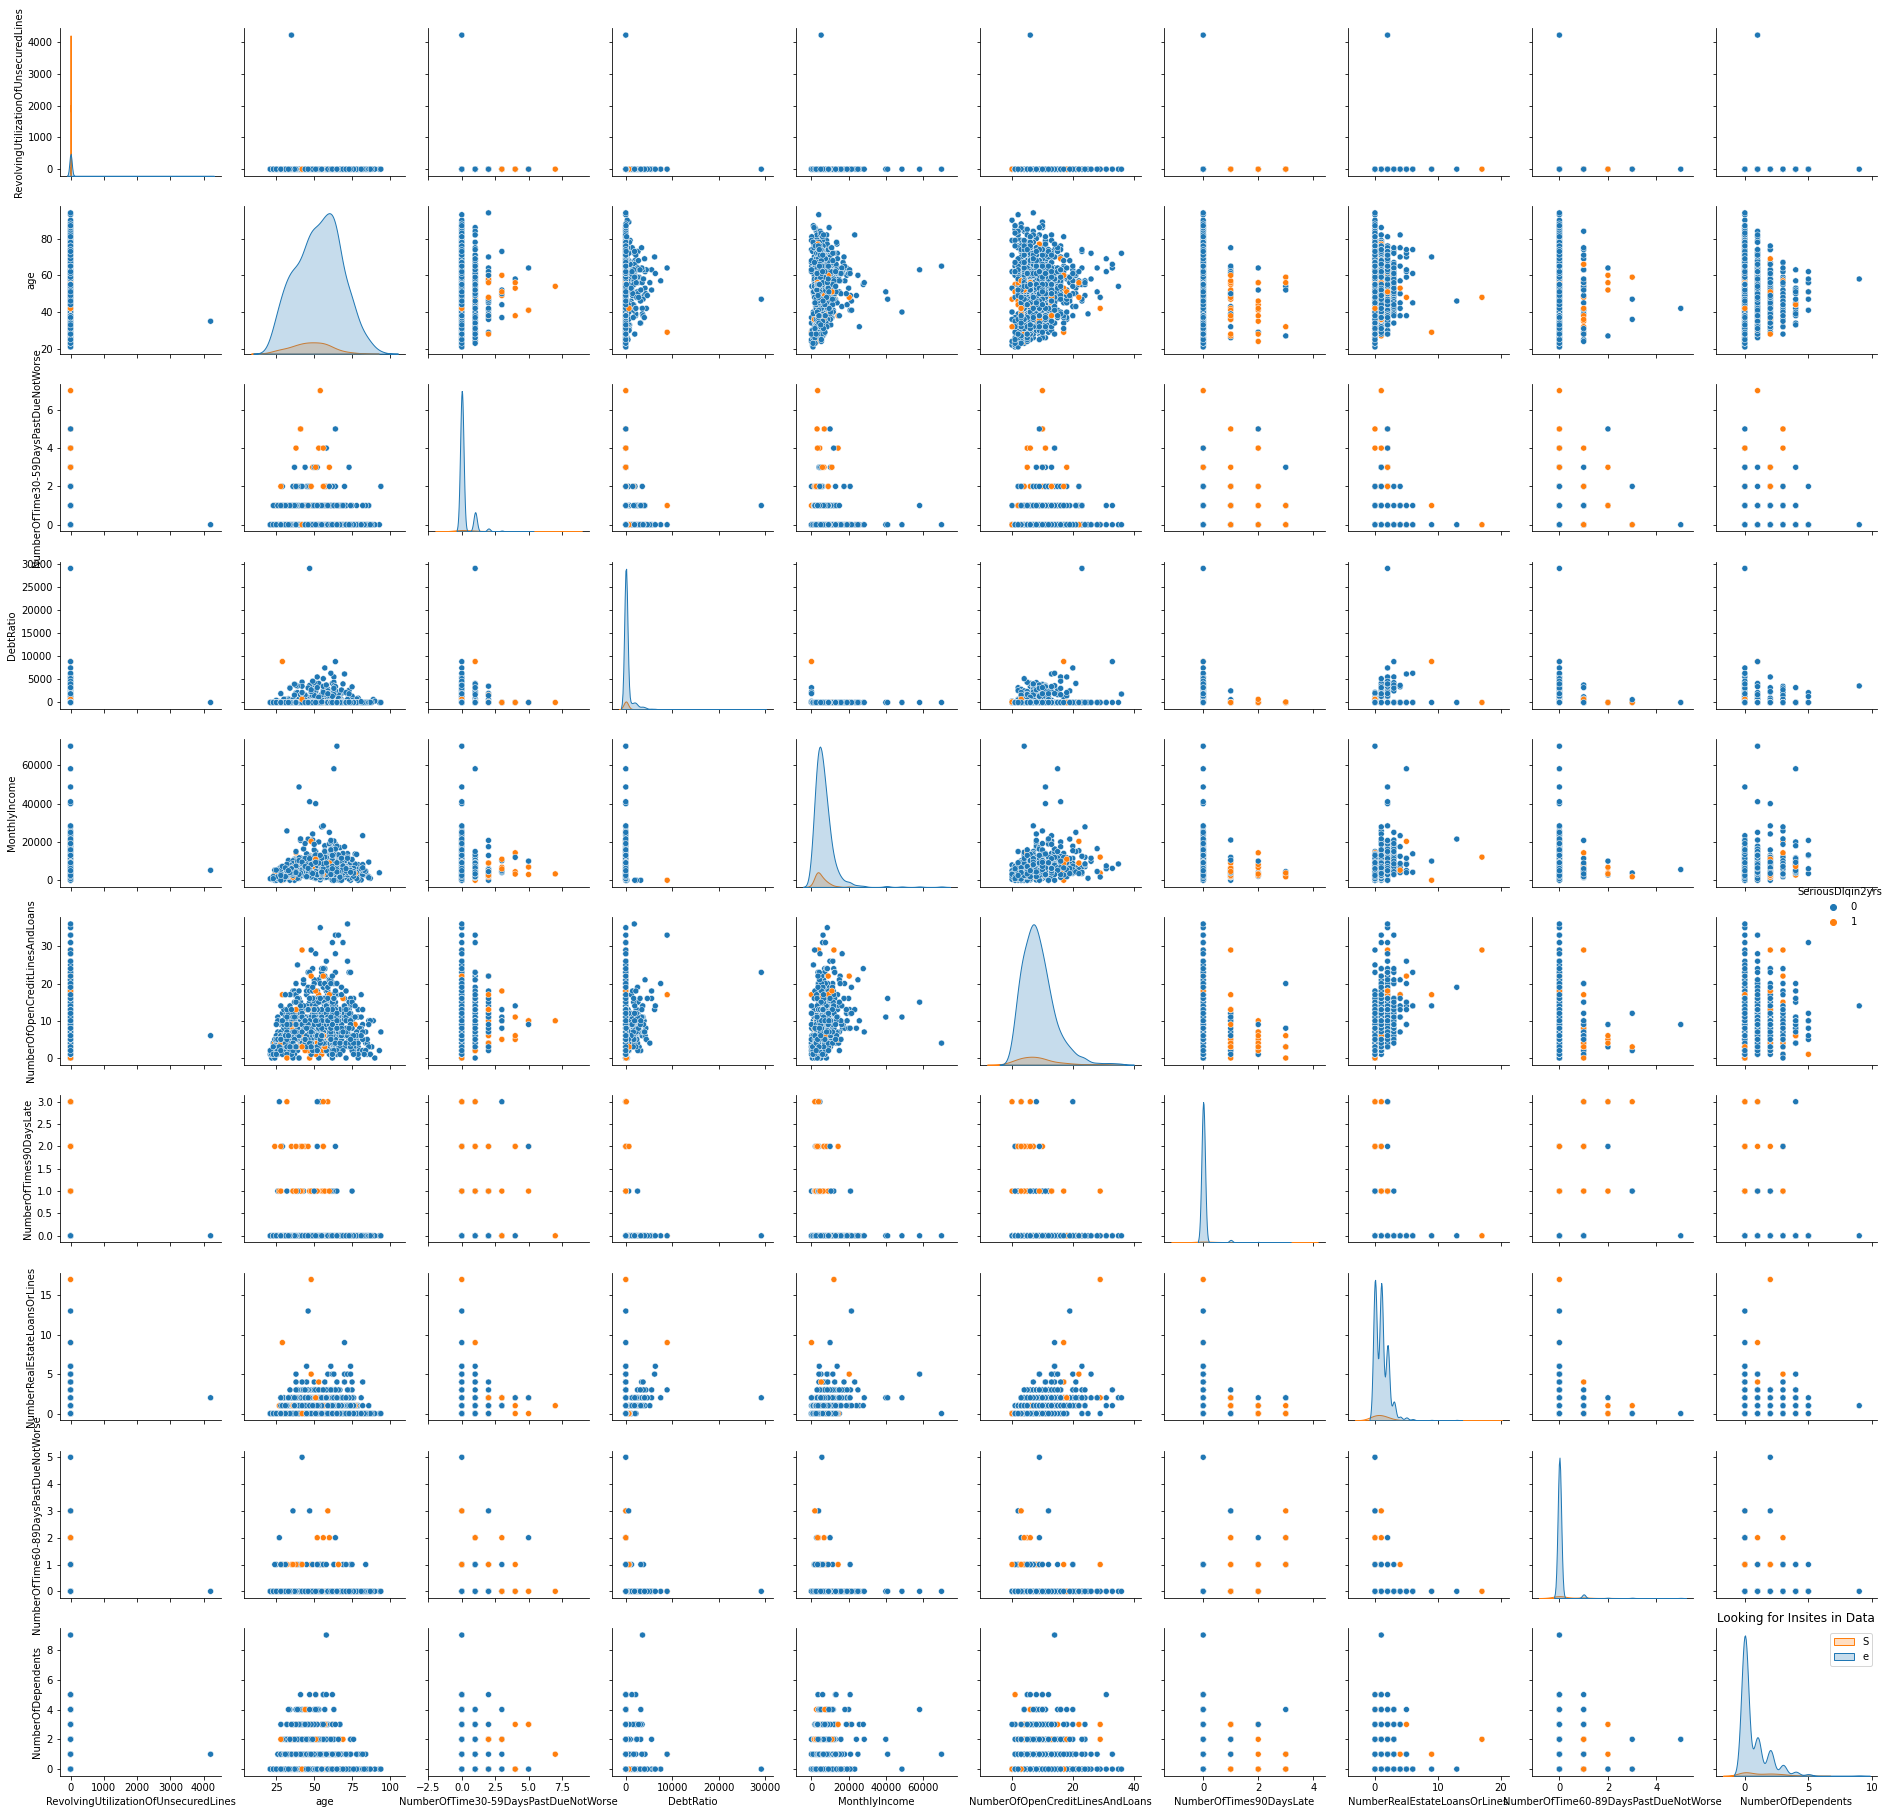

In [9]:
plt.figure(figsize=(15,10))
sns.pairplot(sampled_data,hue="SeriousDlqin2yrs")
plt.title("Looking for Insites in Data")
plt.tight_layout()
plt.legend("SeriousDlqin2yrs")



## Outliersdf.info()

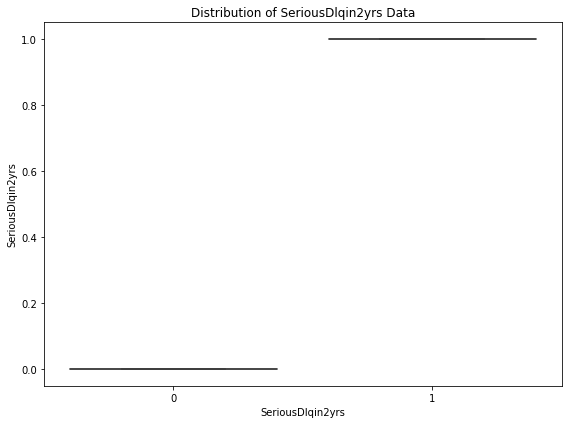

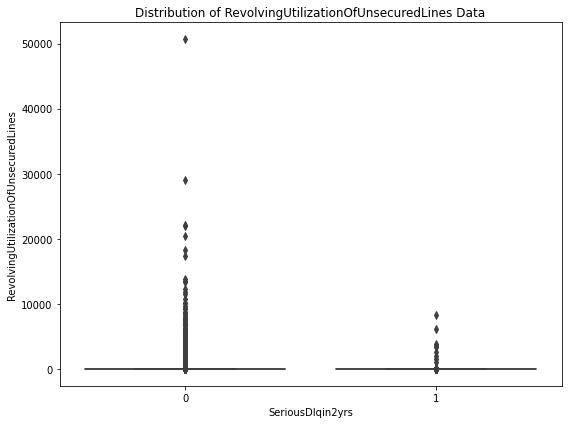

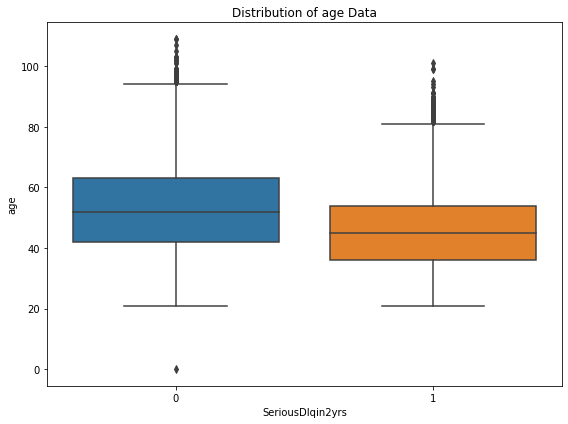

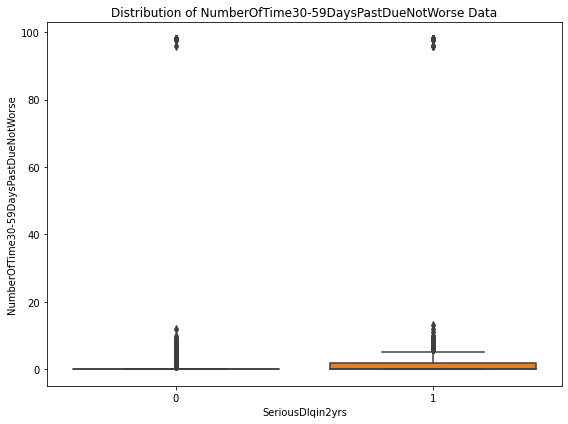

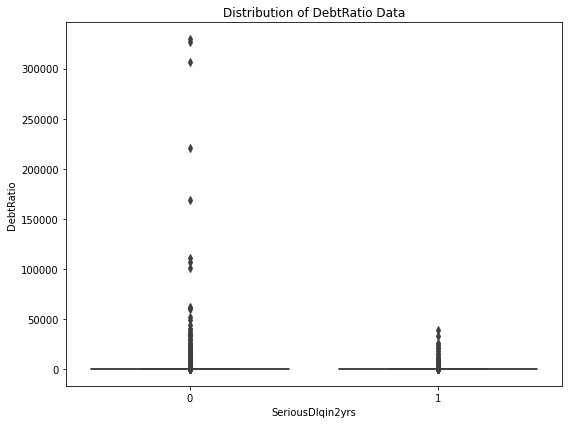

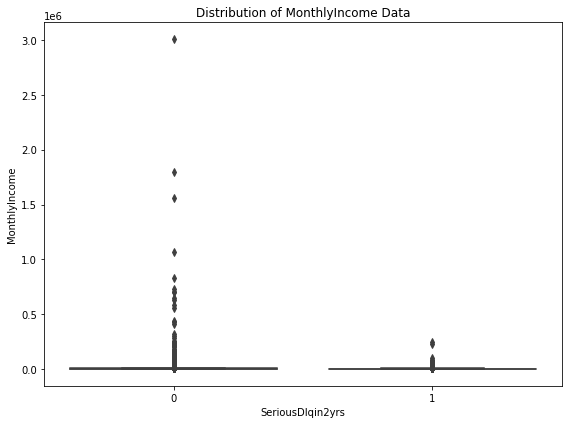

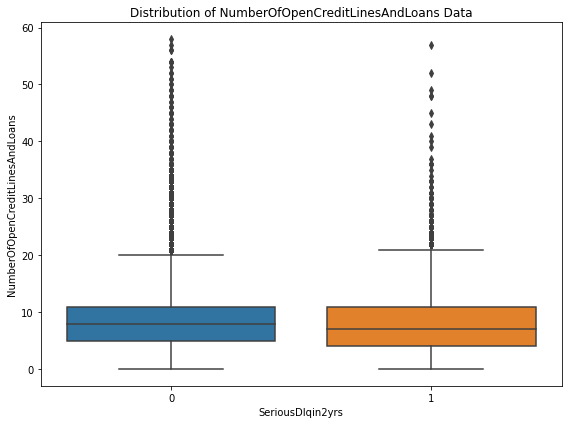

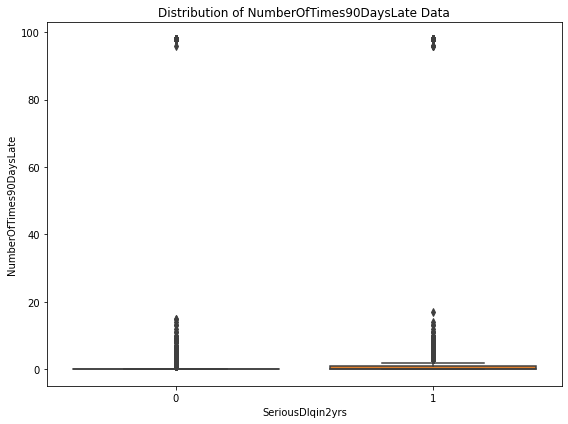

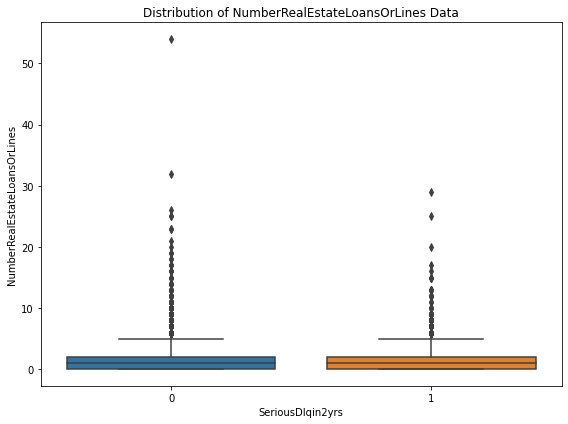

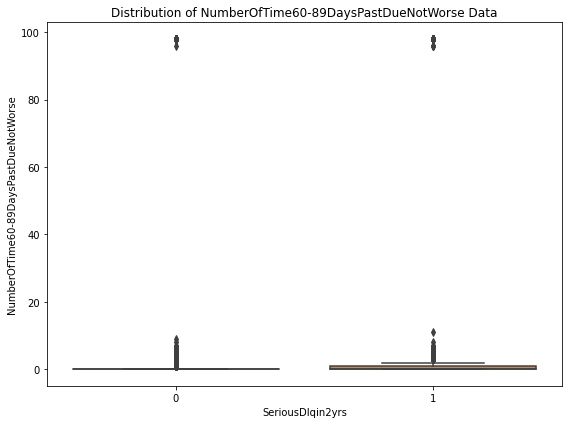

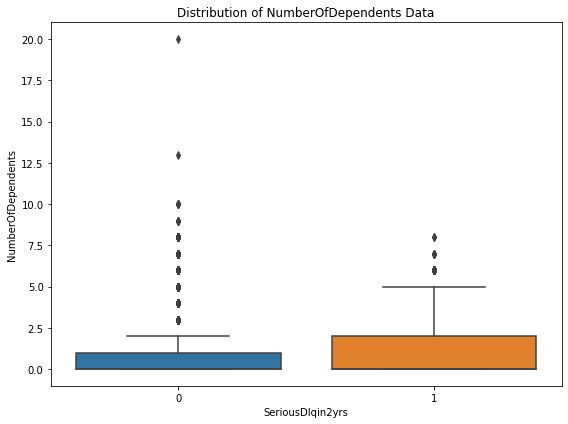

In [10]:
for i,col in enumerate(credit_data.columns,1):
    plt.figure(figsize=(8,6))
    plt.title(f"Distribution of {col} Data")
    sns.boxplot(data=credit_data, x="SeriousDlqin2yrs", y=col)
    plt.tight_layout()
    plt.show()
    

In [11]:
credit_data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

### Data Preprocessing

In [12]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [13]:
credit_data.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [17]:
credit_data[credit_data['MonthlyIncome'].isnull()]['SeriousDlqin2yrs'].value_counts()

0    28062
1     1669
Name: SeriousDlqin2yrs, dtype: int64

In [19]:
credit_data.fillna(0, inplace = True)

In [59]:
train, test = train_test_split(credit_data, test_size=0.3,random_state=31122024)

In [61]:
train_target = train.pop('SeriousDlqin2yrs')
test_target = test.pop('SeriousDlqin2yrs')

In [111]:
weights={0:1.,1:5.}

In [112]:
clf=LogisticRegression(solver='liblinear',class_weight=weights)
clf.fit(train,train_target)

LogisticRegression(class_weight={0: 1.0, 1: 5.0}, solver='liblinear')

In [113]:
y_pred=clf.predict(test)
print(classification_report(test_target,y_pred))
roc_auc_score(test_target,y_pred)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     42022
           1       0.41      0.19      0.26      2978

    accuracy                           0.93     45000
   macro avg       0.68      0.59      0.61     45000
weighted avg       0.91      0.93      0.92     45000



0.5875169116538432

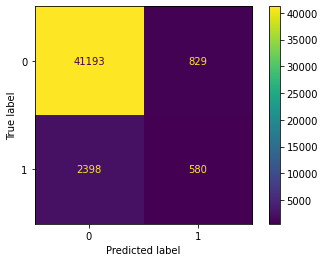

In [114]:
cm_log=confusion_matrix(test_target,y_pred,labels=[0,1])

disp = ConfusionMatrixDisplay(confusion_matrix=cm_log,display_labels=clf.classes_)
disp.plot()

In [115]:
forest=RandomForestClassifier(n_estimators=40,random_state=31122024,max_depth=7, class_weight=weights)
forest=forest.fit(train,train_target)

In [116]:
plot_dist('age', 'Total Balance')

NameError: name 'plot_dist' is not defined

In [ ]:
plot_dist('NumberOfTime30-59DaysPastDueNotWorse', 'Delinquency between 30 -59 days')

In [117]:
feature_names=train.columns
feature_importance_forest=pd.DataFrame(forest.feature_importances_,index=feature_names)
feature_importance_forest[0].nlargest(10)

NumberOfTimes90DaysLate                 0.328797
RevolvingUtilizationOfUnsecuredLines    0.238534
NumberOfTime30-59DaysPastDueNotWorse    0.205510
NumberOfTime60-89DaysPastDueNotWorse    0.130687
age                                     0.035243
NumberOfOpenCreditLinesAndLoans         0.019383
DebtRatio                               0.019123
MonthlyIncome                           0.010924
NumberRealEstateLoansOrLines            0.008994
NumberOfDependents                      0.002804
Name: 0, dtype: float64

In [118]:
predictions=forest.predict(test)
np.bincount(predictions)
print(classification_report(y_true=test_target,y_pred=predictions,target_names=['No Serious Delinquencies','Serious Delinquencies']))
roc_auc_score(test_target,predictions)

                          precision    recall  f1-score   support

No Serious Delinquencies       0.96      0.94      0.95     42022
   Serious Delinquencies       0.39      0.50      0.44      2978

                accuracy                           0.91     45000
               macro avg       0.67      0.72      0.69     45000
            weighted avg       0.93      0.91      0.92     45000



0.7216087904832478

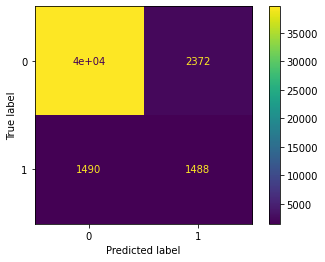

In [119]:
cm=confusion_matrix(test_target,predictions,labels=[0,1])

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=forest.classes_)
disp.plot()